<a href="https://colab.research.google.com/github/jkm2000korea/master_degree/blob/main/3%EC%A3%BC%EC%B0%A8_Data_Transformation_%26_PCA_20240318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/데이터마이닝_2024/예제 데이터')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('BostonHousing.csv')
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [ ]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


<Axes: >

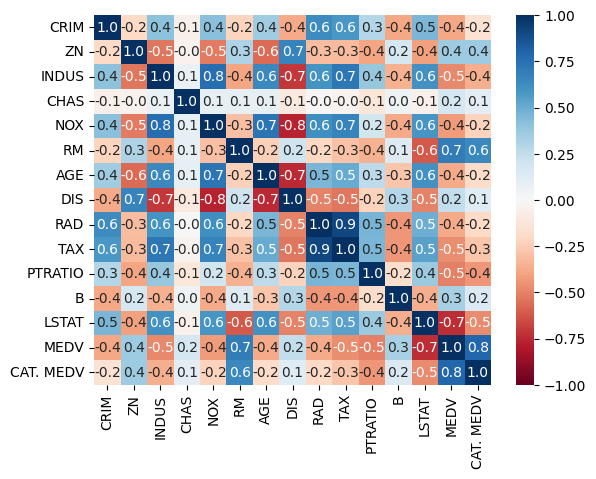

In [ ]:
import seaborn as sns

corr = df1.corr()   # 변수 간 상관관계 도출

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu",
            vmin=-1, vmax=1, annot=True, fmt=".1f")   #RdBu: heatmap 색팔렛트 중 하나 / vmin & vmax: color bar의 최솟값과 최댓값 / annot: 주석 / fmt: 소수점

In [ ]:
df1.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
df1['RM_Categorized'] = pd.cut(df1['RM'], bins=np.arange(0, 11, 1), right=False, labels=False)   # RM 변수를 범주형으로 변환 / right=False: [left, right) / labels=False: 레이블 대신 구간의 인덱스를 반환

pivot_table = df1.pivot_table(index='RM_Categorized', columns='CHAS', aggfunc='size', fill_value=0)   # 피벗 테이블 생성 / aggfunc='size': 카운팅 값을 반환 / fill_value=0: NaN 값을 0으로 반환

print(pivot_table)

CHAS              0   1
RM_Categorized         
3                 2   0
4                13   0
5               147  11
6               253  16
7                45   6
8                11   2


In [ ]:
df2 = df1.rename(columns={"CAT. MEDV":"CAT_MEDV"})   #변수명 변환

crosstab = pd.crosstab(df2.CAT_MEDV, df2.ZN)   #pivot_table을 만드는 또다른 방법
crosstab

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,...,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,...,1,1,0,2,5,1,0,5,4,1


In [ ]:
prop = crosstab/crosstab.sum()
prop

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91129,1.0,0.0,1.0,0.238095,1.0,0.9,1.0,1.0,1.0,...,0.666667,0.75,1.0,0.333333,0.666667,0.5,1.0,0.0,0.0,0.0
1,0.08871,0.0,1.0,0.0,0.761905,0.0,0.1,0.0,0.0,0.0,...,0.333333,0.25,0.0,0.666667,0.333333,0.5,0.0,1.0,1.0,1.0


<ipython-input-36-a212a90c701c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{: .1f}'.format(x) for x in ax.get_yticks()])


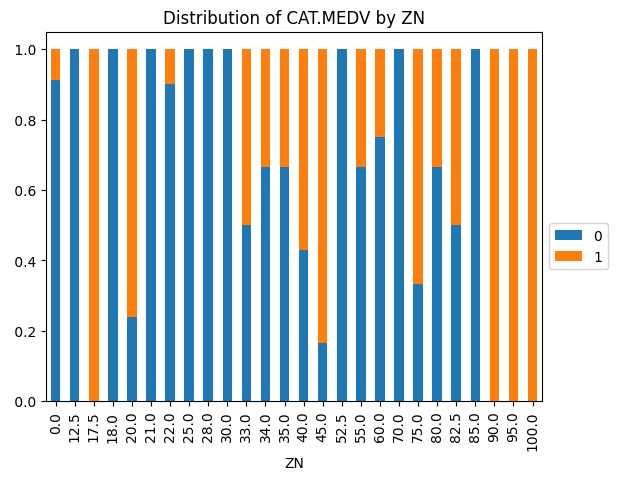

In [ ]:
import matplotlib.pylab as plt

ax = prop.transpose().plot(kind='bar', stacked=True)   #transpose(): 가로, 세로 축 변환
ax.set_yticklabels(['{: .1f}'.format(x) for x in ax.get_yticks()])   #ax.get_yticks: y축의 눈금 위치 / ::포맷 지정자의 시작 / .format(x): x를 소수점 1자리 형태로 저장 / ax.set_yticklabels: y축 레이블로 받음
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(bbox_to_anchor=(1,0.5))   #bbox_to_anchor: legend(범례)의 위치를 상대적으로 지정 (1: 우측 경계 바깥쪽, 0.5: 축의 수직 중앙)
plt.show()

In [ ]:
#### PCA

In [ ]:
df3 = pd.read_csv('cereal.csv')
df3

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [ ]:
corr_cereal = df3.corr()
corr_cereal

<ipython-input-39-92cc74dc35f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_cereal = df3.corr()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


In [ ]:
df3.var()   #변수별 분산

<ipython-input-40-8be02821bf2a>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.var()


calories     379.630895
protein        1.198565
fat            1.012987
sodium      7027.853725
fiber          5.680424
carbo         18.309467
sugars        19.757006
potass      5081.809638
vitamins     499.188312
shelf          0.693096
weight         0.022643
cups           0.054157
rating       197.326321
dtype: float64

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   #n_component: 주성분 개수
pca.fit(df3[['calories', 'rating']])
pca_summary = pd.DataFrame({'Variance': pca.explained_variance_,
                           'Proportion of variance': pca.explained_variance_ratio_})
pca_summary = pca_summary.transpose()
pca_summary.columns = ['PC1', 'PC2']
pca_summary.round(4)

,PC1,PC2
Variance,498.0245,78.9327
Proportion of variance,0.8632,0.1368


In [ ]:
pca_component = pd.DataFrame(pca.components_.transpose(), columns=['PC1', 'PC2'],
                             index=['calories', 'rating'])   #pca.components_: 주성분별 가중치(weights) 반환
pca_component

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


In [ ]:
scores = pd.DataFrame(pca.transform(df3[['calories', 'rating']]),
                      columns=['PC1', 'PC2'])   #pc.transform: 주성분별 값 반환
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


In [ ]:
pca = PCA()
pca.fit(df3.iloc[:, 3:].dropna(axis=0))   #.dropna(axis=0) 결측값이 있는 행을 제거
pca_summary = pd.DataFrame({'Variance': pca.explained_variance_,
                            'Proportion of variance' : pca.explained_variance_ratio_,
                            'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pca_summary = pca_summary.transpose()
pca_summary.columns = ['PC{}'.format(i) for i in range(1, len(pca_summary.columns)+1)]   #range(start, stop)은 stop-1까지의 정수를 생성, 따라서 +1 처리
pca_summary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Variance,7195.9356,5093.9772,500.8058,355.9084,74.4650,5.6444,4.3473,0.6489,0.4829,0.2833,0.034,0.0045,0.0
Proportion of variance,0.5438,0.3850,0.0378,0.0269,0.0056,0.0004,0.0003,0.0000,0.0000,0.0000,0.000,0.0000,0.0
Cumulative proportion,0.5438,0.9288,0.9666,0.9935,0.9991,0.9996,0.9999,0.9999,1.0000,1.0000,1.000,1.0000,1.0


In [ ]:
pca_component = pd.DataFrame(pca.components_.transpose(), columns=pca_summary.columns,
                             index=df3.iloc[:, 3:].columns)
pca_component.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
calories,0.076192,-0.010006,0.611914,-0.612823,0.464050
protein,-0.001398,0.008333,-0.000356,0.001783,0.055719
fat,-0.000118,0.002595,0.015763,-0.025982,-0.016691
sodium,0.983021,0.112178,-0.141872,-0.003522,0.015170
fiber,-0.004606,0.029856,-0.019346,0.020273,0.017485
carbo,0.019617,-0.017911,0.015379,0.031108,0.348461
sugars,0.006250,0.001528,0.100421,-0.112461,-0.287017
potass,-0.107276,0.990512,0.028274,-0.043969,-0.041434
vitamins,0.101106,0.022197,0.702645,0.702849,-0.024220
shelf,-0.000893,0.004086,0.012203,0.005840,-0.004883


In [ ]:
from sklearn import preprocessing

pca = PCA()
pca.fit(preprocessing.scale(df3.iloc[:, 3:].dropna(axis=0)))   #preprocessing.scale: 정규화
pca_summary = pd.DataFrame({'Variance': pca.explained_variance_,
                            'Proportion of variance' : pca.explained_variance_ratio_,
                            'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pca_summary = pca_summary.transpose()
pca_summary.columns = ['PC{}'.format(i) for i in range(1, len(pca_summary.columns)+1)]
pca_summary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Variance,3.6573,3.1798,1.8406,1.0763,0.9838,0.7286,0.6801,0.4558,0.3073,0.1324,0.0741,0.0550,0.0
Proportion of variance,0.2777,0.2414,0.1397,0.0817,0.0747,0.0553,0.0516,0.0346,0.0233,0.0101,0.0056,0.0042,0.0
Cumulative proportion,0.2777,0.5191,0.6589,0.7406,0.8153,0.8706,0.9222,0.9568,0.9802,0.9902,0.9958,1.0000,1.0


In [ ]:
pca_component = pd.DataFrame(pca.components_.transpose(), columns=pca_summary.columns,
                             index=df3.iloc[:, 3:].columns)
pca_component.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.333258,-0.354014,0.073083,0.310356,0.100117
protein,0.303510,-0.184091,0.214021,0.487982,0.185926
fat,-0.061171,-0.333425,-0.277022,0.364438,0.449612
sodium,-0.214987,-0.128996,0.392681,-0.023247,-0.307117
fiber,0.427689,-0.236617,0.101606,-0.093598,-0.243944
carbo,-0.194541,0.155849,0.556569,0.111599,0.126972
sugars,-0.268234,-0.318593,-0.317835,-0.203435,-0.299852
potass,0.359694,-0.349417,0.084311,-0.007793,-0.187774
vitamins,-0.150384,-0.174544,0.406715,-0.438602,0.222438
shelf,0.113605,-0.279502,0.040109,-0.483364,0.579050


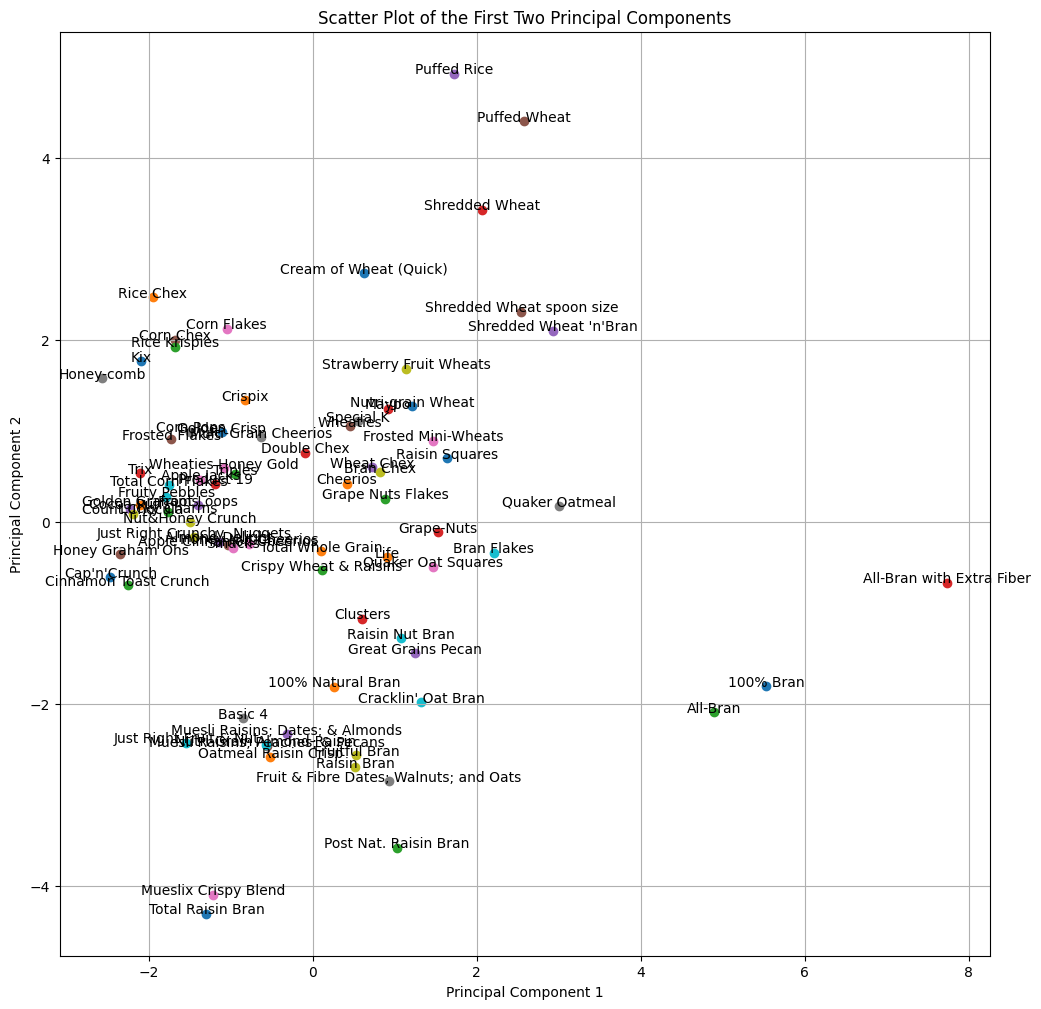

In [ ]:

pca_scores = pca.transform(preprocessing.scale(df3.iloc[:, 3:].dropna(axis=0)))
pc1_scores = pca_scores[:, 0]   # 첫 번째와 두 번째 주성분에 대한 점수 얻기
pc2_scores = pca_scores[:, 1]

# 산점도 그리기
plt.figure(figsize=(12, 12))  # 그래프 크기 조정
for i in range(len(pc1_scores)):
    plt.scatter(pc1_scores[i], pc2_scores[i])
    plt.annotate(df3.iloc[i, 0],  # 시리얼 이름
                 (pc1_scores[i], pc2_scores[i]),
                 ha='center')  #ha: horizontalalignment, 즉 수평 중앙 정렬

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.grid(True)
plt.show()
